In [1]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time 

from scipy.stats import uniform

import datetime
from pandas_datareader import data as pdr
import yfinance as yf

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# 1. Import Data

In [3]:
df = pd.read_csv('./df.csv')
df.head()

,date,open,high,low,close,adjusted close,volume,totalAssets,yield,trailingAnnualDividendYield,...,trailingPE,fiftyTwoWeekHigh,fiftyTwoWeekLow,regularMarketVolume,averageVolume,averageDailyVolume10Day,threeYearAverageReturn,fiveYearAverageReturn,twoHundredDayAverage,fiftyDayAverage
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.799770,1003200,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.983273,480500,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.038315,201300,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.313566,529400,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.423655,531500,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353


In [4]:
df.tail()

,date,open,high,low,close,adjusted close,volume,totalAssets,yield,trailingAnnualDividendYield,...,trailingPE,fiftyTwoWeekHigh,fiftyTwoWeekLow,regularMarketVolume,averageVolume,averageDailyVolume10Day,threeYearAverageReturn,fiveYearAverageReturn,twoHundredDayAverage,fiftyDayAverage
7183,2021-08-09,442.459991,442.799988,441.309998,442.130005,442.130005,41222600,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353
7184,2021-08-10,442.609985,443.440002,441.880005,442.679993,442.679993,43339300,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353
7185,2021-08-11,443.820007,443.880005,442.619995,443.779999,443.779999,44034300,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353
7186,2021-08-12,443.619995,445.260010,442.660004,445.109985,445.109985,38909400,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353
7187,2021-08-13,445.589996,445.940002,445.070007,445.920013,445.920013,39388300,374031319040,0.013,0.012498,...,3.094346,445.94,319.8,39470251,60534057,42293000,0.1858,0.1747,412.61835,436.52353


# 3. EDA

In [ ]:
def plot_results(actual_y,predicted_y,method,date):
    mse = mean_squared_error(actual_y,predicted_y)
    
    plt.figure(figsize=(16,4))
    plt.plot(date,actual_y)
    plt.plot(date,predicted_y)
    plt.legend(['Actual','Predicted'])
    plt.title(f'{method} (MSE: {mse})')        
    plt.show()

Text(0, 0.5, 'Price')

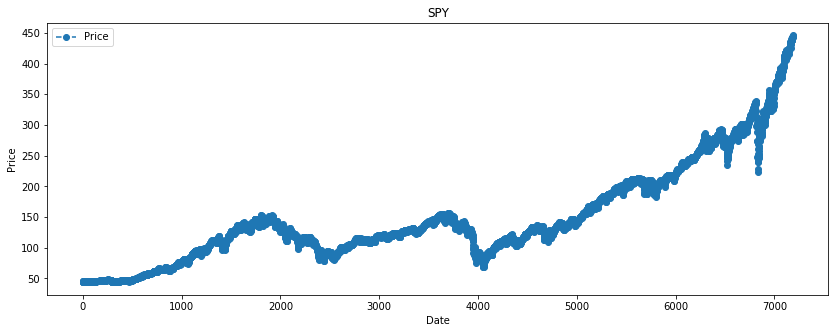

In [18]:

df['close'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o');
plt.legend(['Price'])
plt.title('SPY')        
plt.xlabel('Date')        
plt.ylabel('Price')        

# plt.show()

In [ ]:
df = df.pct_change()
df.head()

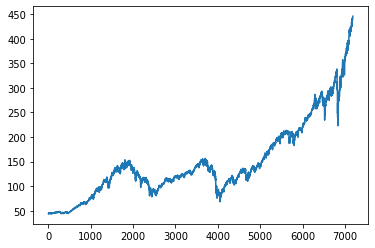

In [27]:
df.dropna(inplace=True)
df.close.plot()

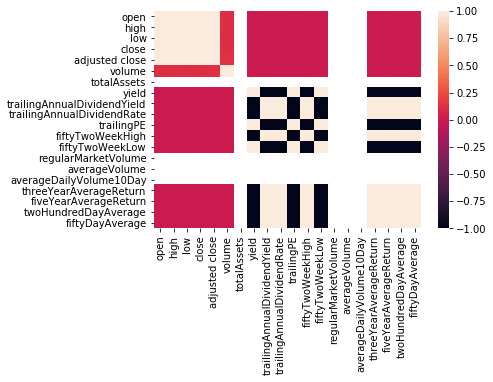

In [26]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [38]:
close = df['close']
mavg = close.rolling(window=200).mean()

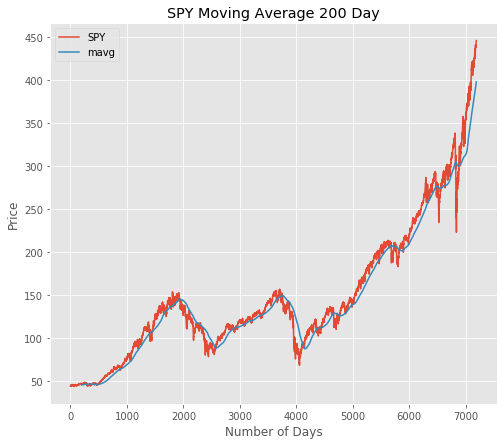

In [47]:
import matplotlib.pyplot as plt
from matplotlib import style

mpl.rc('figure', figsize=(8, 7))


close.plot(label='SPY')
mavg.plot(label='mavg')
plt.xlabel('Number of Days')
plt.ylabel('Price')
plt.title('SPY Moving Average 200 Day')
plt.legend()

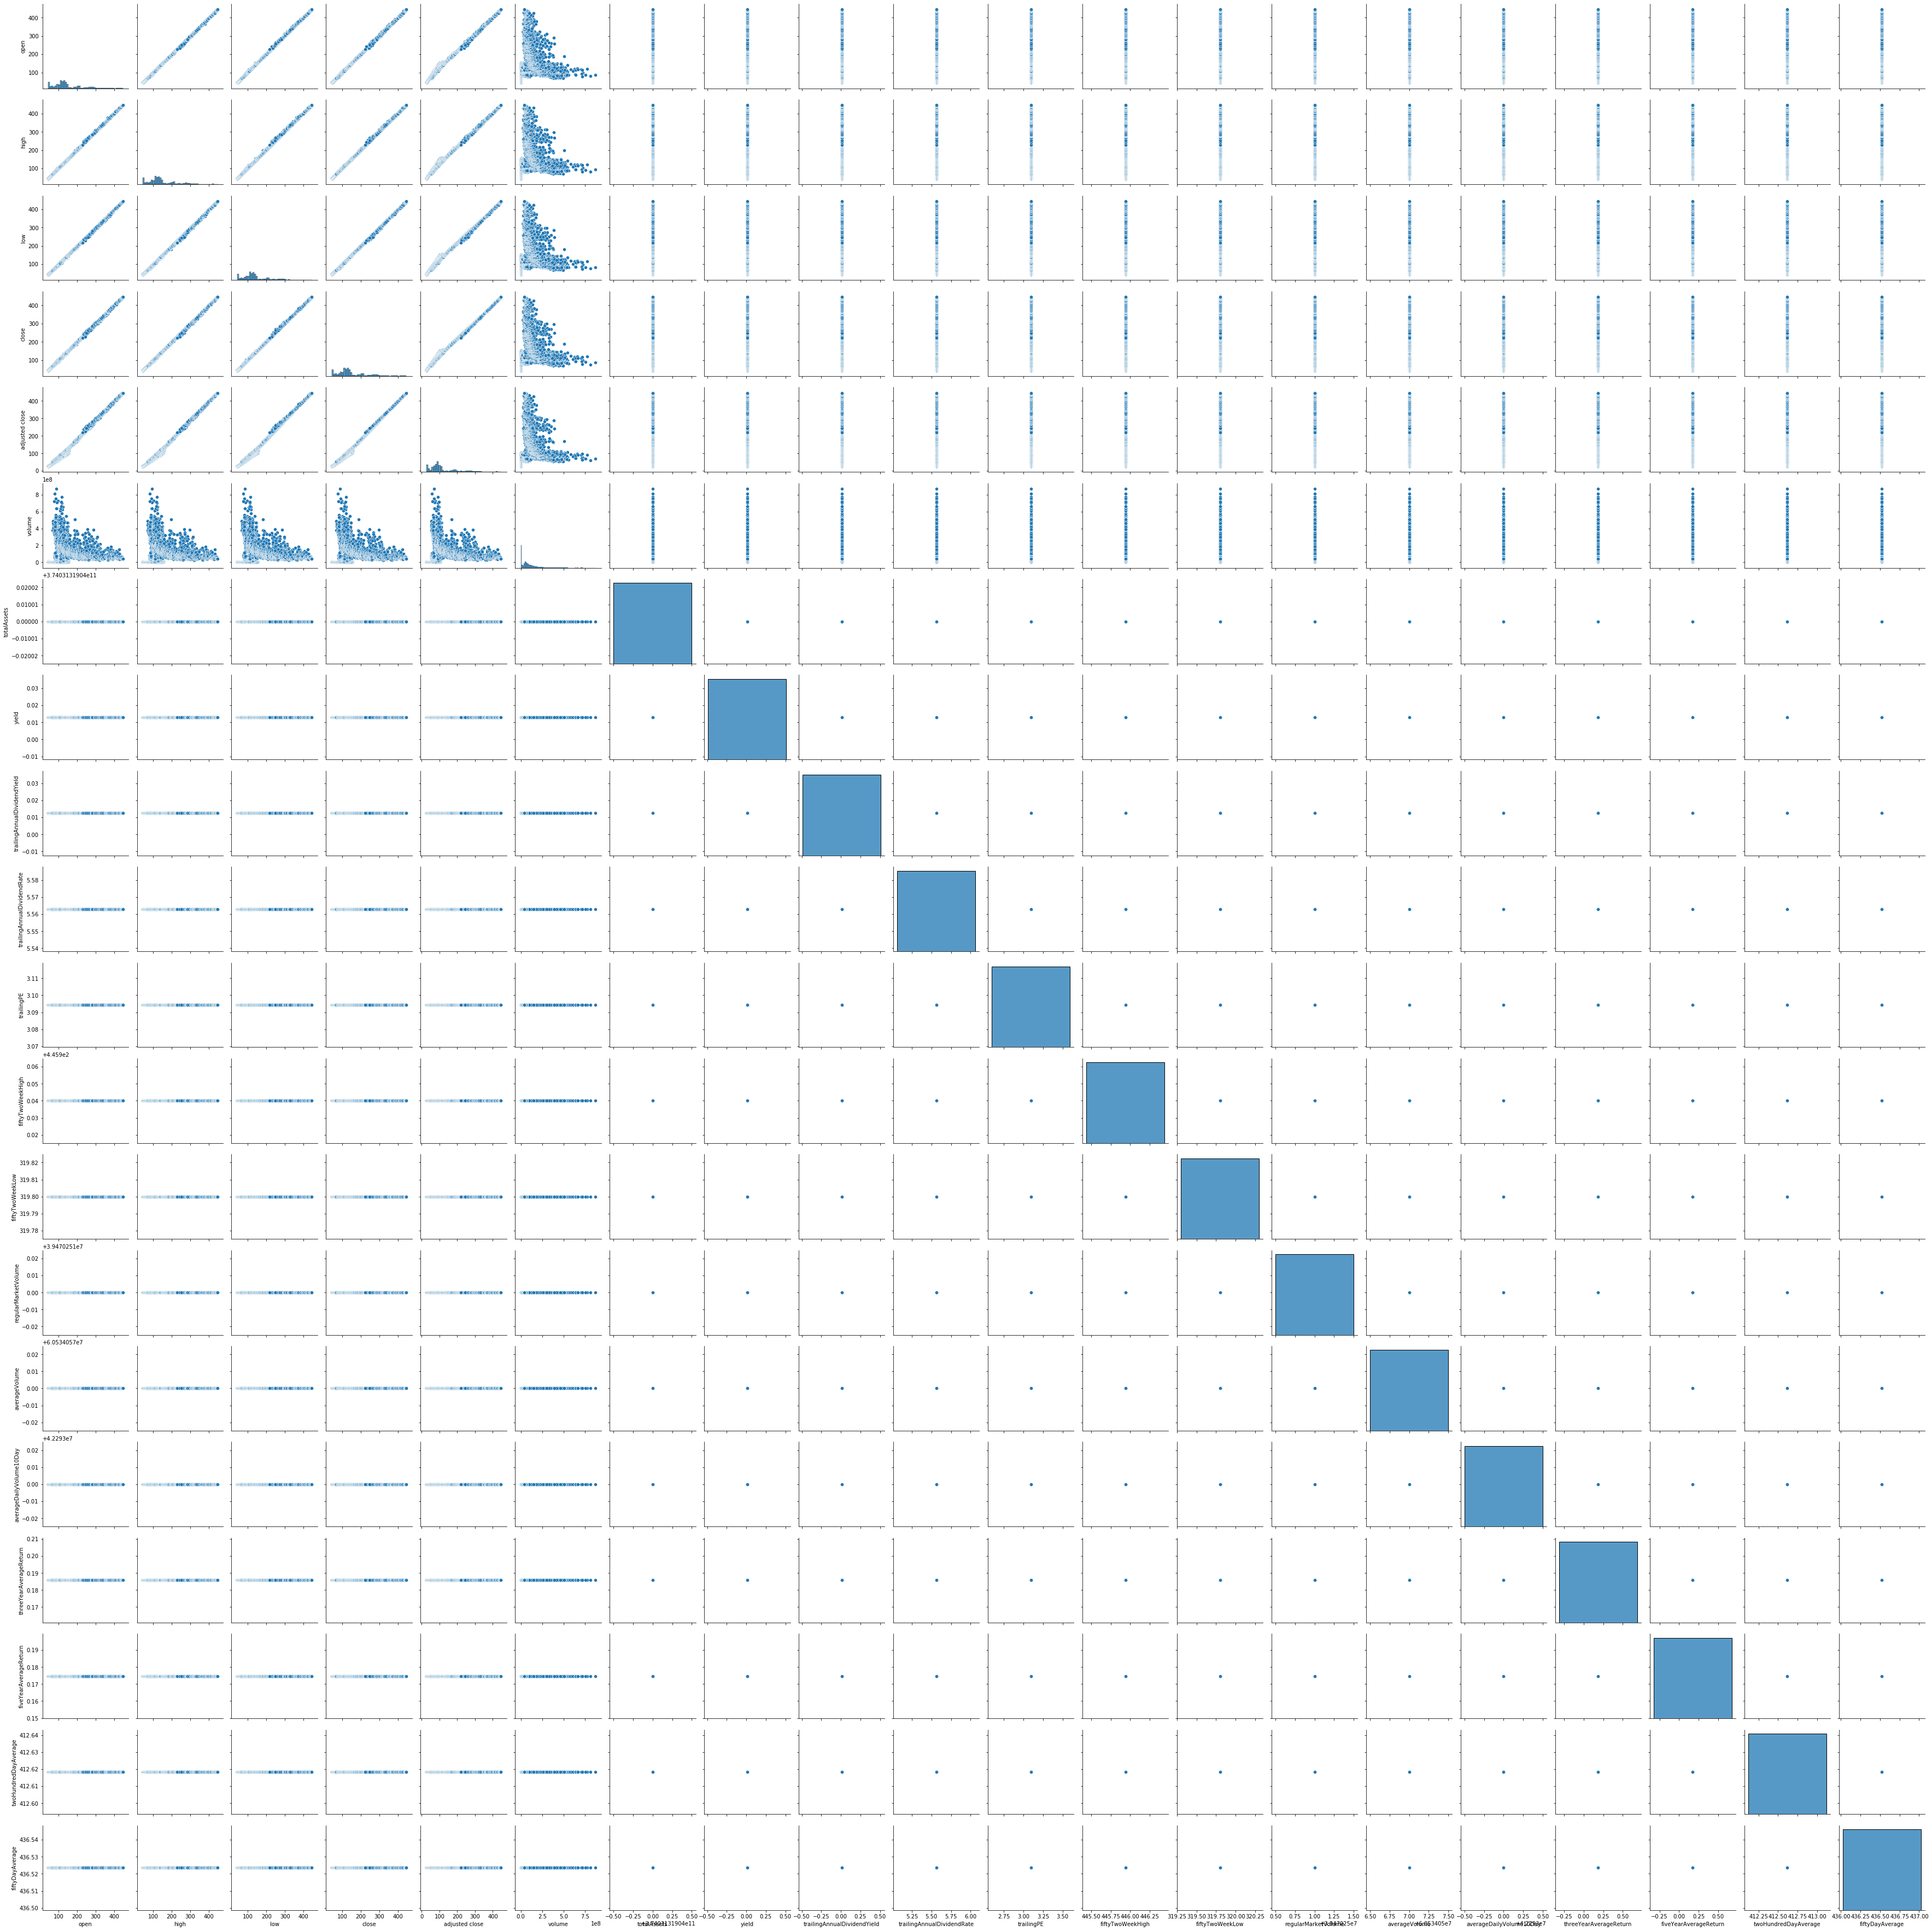

In [7]:
sns.pairplot(df.dropna())

In [ ]:
# Plot correlation matrix

heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))

heat=sns.heatmap(df['close'].corr, 
                   ax=ax, 
                   mask=mask, 
                   vmax=.5, 
                   square=True, 
                   linewidths=.2, 
                   cmap="Blues_r")

heat_fig.subplots_adjust(top=.93)

heat_fig.suptitle('Volatility vs. Volume', fontsize=14, fontweight='bold')



In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.hist(figsize=(15, 15));


In [ ]:
# not working, i think b/c we are using 1min interval- data

# https://plotly.com/python/candlestick-charts/#simple-candlestick-with-pandas

import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('df.csv')

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()

In [ ]:
import matplotlib.pyplot as plt

df.plot()
plt.title('SPY stock (Daily)')
plt.show()

In [ ]:
df.dtypes

In [ ]:
columns=['open','high','low','close','adjusted close','volume']
df.columns=(columns)

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.info